In [5]:
import numpy as np
import matplotlib.pyplot as plt
from cnn import *
from data_utils import get_CIFAR10_data
from layers import *
from solver import Solver
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

X_train:  (500, 3, 32, 32)
y_train:  (500,)
X_val:  (50, 3, 32, 32)
y_val:  (50,)
X_test:  (50, 3, 32, 32)
y_test:  (50,)


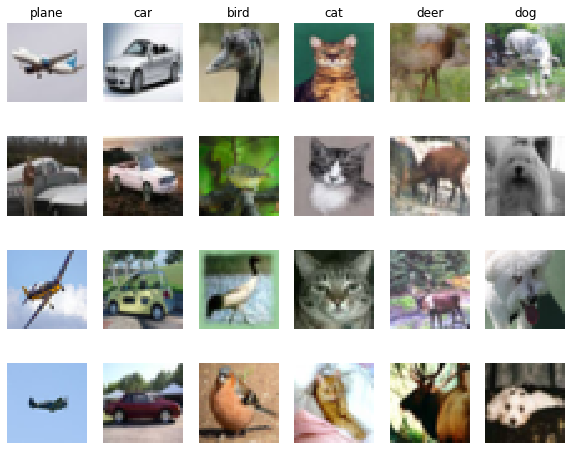

In [6]:
from data_utils import load_CIFAR10
cifar10_dir = 'C:/Users/lenovo/PycharmProjects/CNN/cnn/cifar-10-batches-py'
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog']
num_classes = len(classes)
samples_per_class = 4
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

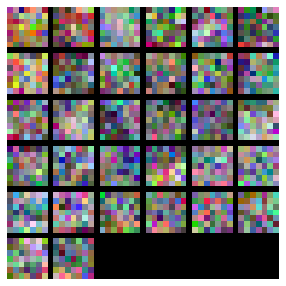

In [16]:
from vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

(Iteration 1 / 500) loss: 2.674229
(Epoch 0 / 2) train acc: 0.100000; val_acc: 0.120000
(Iteration 11 / 500) loss: 2.660170
(Iteration 21 / 500) loss: 2.633211
(Iteration 31 / 500) loss: 2.610107
(Iteration 41 / 500) loss: 2.584020
(Iteration 51 / 500) loss: 2.547787
(Iteration 61 / 500) loss: 2.538564
(Iteration 71 / 500) loss: 2.523134
(Iteration 81 / 500) loss: 2.505126
(Iteration 91 / 500) loss: 2.462725
(Iteration 101 / 500) loss: 2.445747
(Iteration 111 / 500) loss: 2.346115
(Iteration 121 / 500) loss: 2.172274
(Iteration 131 / 500) loss: 2.446870
(Iteration 141 / 500) loss: 2.457572
(Iteration 151 / 500) loss: 2.310002
(Iteration 161 / 500) loss: 2.372549
(Iteration 171 / 500) loss: 2.158933
(Iteration 181 / 500) loss: 2.371098
(Iteration 191 / 500) loss: 2.527359
(Iteration 201 / 500) loss: 2.505571
(Iteration 211 / 500) loss: 2.441171
(Iteration 221 / 500) loss: 2.488364
(Iteration 231 / 500) loss: 2.450944
(Iteration 241 / 500) loss: 2.387926
(Epoch 1 / 2) train acc: 0.152000

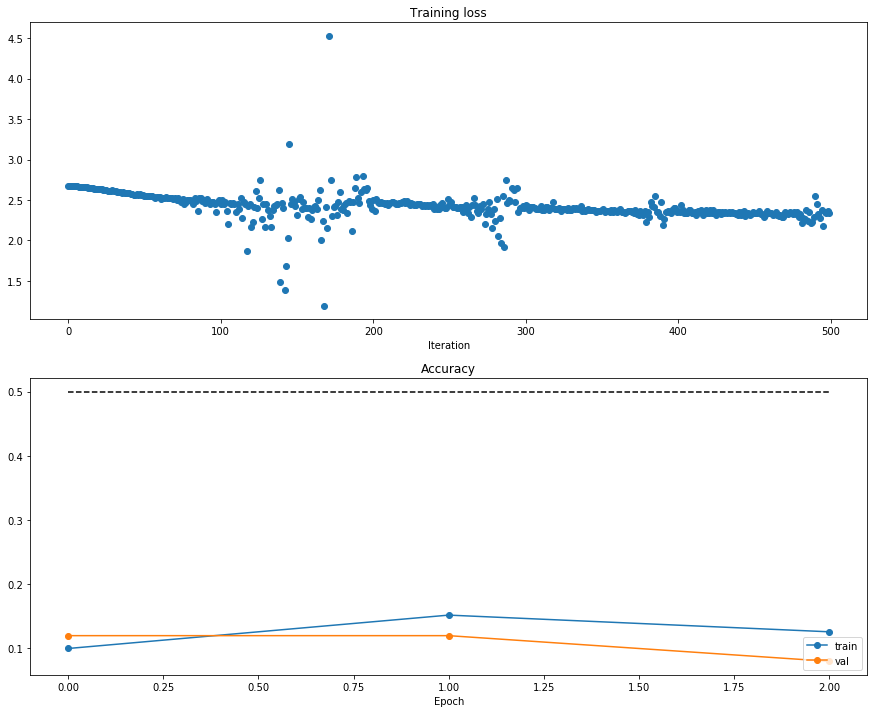

Validation set accuracy:  0.12
Test set accuracy:  0.04


In [33]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

try:
    from . import data_utils
    from . import solver
    from . import cnn
except Exception:
    import data_utils
    import solver
    import cnn

import numpy as np
# 获取样本数据
data = data_utils.get_CIFAR10_data()
model = cnn.ThreeLayerConvNet(reg=0.9)
solver = solver.Solver(model, data,
                lr_decay=0.95,
                print_every=10, num_epochs=2, batch_size=2,
                update_rule='sgd_momentum',
                optim_config={'learning_rate': 5e-4, 'momentum': 0.9})
# 训练，获取最佳model
solver.train()

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()


best_model = model
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print ('Validation set accuracy: ',(y_val_pred == data['y_val']).mean())
print ('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

(Iteration 1 / 500) loss: 2.673687
(Epoch 0 / 2) train acc: 0.106000; val_acc: 0.060000
(Iteration 11 / 500) loss: 132.829514
(Iteration 21 / 500) loss: 151.733074
(Iteration 31 / 500) loss: 143.686782
(Iteration 41 / 500) loss: 1095.431487
(Iteration 51 / 500) loss: 345.599900
(Iteration 61 / 500) loss: 325.310176
(Iteration 71 / 500) loss: 416.744809
(Iteration 81 / 500) loss: 400.228554
(Iteration 91 / 500) loss: 601.700656
(Iteration 101 / 500) loss: 353.828348
(Iteration 111 / 500) loss: 301.171380
(Iteration 121 / 500) loss: 254.155213
(Iteration 131 / 500) loss: 231.394061
(Iteration 141 / 500) loss: 209.661143
(Iteration 151 / 500) loss: 181.965719
(Iteration 161 / 500) loss: 142.139717
(Iteration 171 / 500) loss: 111.104778
(Iteration 181 / 500) loss: 86.747058
(Iteration 191 / 500) loss: 67.109482
(Iteration 201 / 500) loss: 51.460416
(Iteration 211 / 500) loss: 42.909286
(Iteration 221 / 500) loss: 43.612508
(Iteration 231 / 500) loss: 42.552296
(Iteration 241 / 500) loss: 3

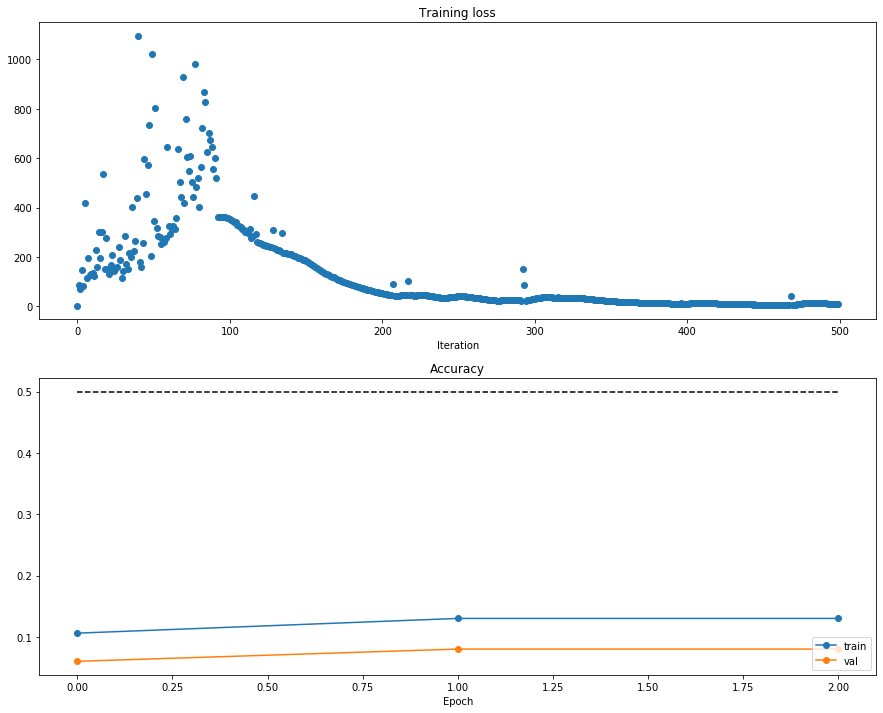

Validation set accuracy:  0.08
Test set accuracy:  0.06


"\nfrom vis_utils import visualize_grid\n\ndef show_net_weights(net):\n    W1 = net.params['W1']\n    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)\n    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))\n    plt.gca().axis('off')\nshow_net_weights(best_model)\nplt.show()\n"

In [15]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt


try:
    from . import data_utils
    from . import solver
    from . import conv
except Exception:
    import data_utils
    import solver
    import conv

import numpy as np
# 获取样本数据
data = data_utils.get_CIFAR10_data()
）
model = conv.ThreeLayerConvNet(reg=0.9)
solver = solver.Solver(model, data,
                lr_decay=0.95,
                print_every=10, num_epochs=2, batch_size=2,
                update_rule='adam',
                optim_config={'learning_rate':1e-2 , 'momentum': 0.9})
# 训练，获取最佳model
solver.train()

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()


best_model = model
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print ('Validation set accuracy: ',(y_val_pred == data['y_val']).mean())
print ('Test set accuracy: ', (y_test_pred == data['y_test']).mean())
